# Setting Up Your Environment

Mount Gdrive to Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Change Working Directory

In [2]:
%cd /content/gdrive/MyDrive/Github

/content/gdrive/MyDrive/Github


Initialze new Git repo *(run this cell once when first time setting up)*





In [ ]:
!git init student-prediction-outcome-for-mejaku-app

Initialized empty Git repository in /content/gdrive/MyDrive/Github/student-prediction-outcome-for-mejaku-app/.git/


Change Working Directory to Git

In [3]:
%cd student-prediction-outcome-for-mejaku-app/

/content/gdrive/MyDrive/Github/student-prediction-outcome-for-mejaku-app


---

# Preparing Dataset

In [ ]:
import pandas as pd

filename = 'data/Student Engagement Level-Binary.csv'
df1 = pd.read_csv(filename, header=None)

df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Student ID,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
1,student000000,143,344,58,0,3,0,0,0,178.1666667,92.71666667,116.1666667,129.0166667,H
2,student000001,70,342,0,0,4,0,0,0,294.0333333,196.0833333,217.75,235.9555556,L
3,student000002,42,219,0,0,3,0,0,0,169.6,235.7333333,260.3333333,221.8888889,L
4,student000003,92,271,2,0,6,0,0,0,341.15,245.9,271.2166667,286.0888889,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,student000481,98,281,0,0,1,0,0,0,175.2,89.96666667,109.2666667,124.8111111,H
483,student000482,85,258,1,0,2,0,0,0,127.6333333,58.78333333,80.55,88.98888889,H
484,student000483,99,206,0,0,6,0,0,0,177.85,185.4,220.2166667,194.4888889,L
485,student000484,51,158,0,0,2,0,0,0,125.9,32.45,44.46666667,67.60555556,H


In [ ]:
filename = 'data/Student Performance Prediction-Binary.csv'
df2 = pd.read_csv(filename, header=None)

df2

,0,1,2,3,4,5,6,7,8,9
0,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
1,student000000,95,91,70,90,84,64,85,85,G
2,student000001,85,76,65,61,73,64,76,76,G
3,student000002,85,41,73,61,73,61,73,73,G
4,student000003,80,78,80,79,79,57,80,79,G
...,...,...,...,...,...,...,...,...,...,...
482,student000481,90,85,93,87,81,77,92,92,G
483,student000482,80,68,93,70,83,83,90,90,G
484,student000483,80,86,93,95,90,83,96,96,G
485,student000484,75,68,80,76,88,50,78,78,G


Cleaning Up Column Names



In [ ]:
df1.columns = [
  'Student Id',
  'Logins',
  'Content Reads',
  'Forum Reads',
  'Forum Posts',
  'Quiz Reviews before submission',
  'Assignment 1 lateness indicator',
  'Assignment 2 lateness indicator',
  'Assignment 3 lateness indicator',
  'Assignment 1 duration to submit (in hours)',
  'Assignment 2 duration to submit (in hours)',
  'Assignment 3 duration to submit (in hours)',
  'Average time to submit assignment (in hours)',
  'Engagement Level'
]

df1 = df1.drop([0])
df1

,Student Id,Logins,Content Reads,Forum Reads,Forum Posts,Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level
1,student000000,143,344,58,0,3,0,0,0,178.1666667,92.71666667,116.1666667,129.0166667,H
2,student000001,70,342,0,0,4,0,0,0,294.0333333,196.0833333,217.75,235.9555556,L
3,student000002,42,219,0,0,3,0,0,0,169.6,235.7333333,260.3333333,221.8888889,L
4,student000003,92,271,2,0,6,0,0,0,341.15,245.9,271.2166667,286.0888889,L
5,student000004,116,379,0,0,1,0,0,0,325.5,236.2833333,260.7333333,274.1722222,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,student000481,98,281,0,0,1,0,0,0,175.2,89.96666667,109.2666667,124.8111111,H
483,student000482,85,258,1,0,2,0,0,0,127.6333333,58.78333333,80.55,88.98888889,H
484,student000483,99,206,0,0,6,0,0,0,177.85,185.4,220.2166667,194.4888889,L
485,student000484,51,158,0,0,2,0,0,0,125.9,32.45,44.46666667,67.60555556,H


In [ ]:
df2.columns = [
  'Student Id',
  'Quiz01',
  'Assignment01',
  'Midterm Exam',
  'Assignment02',
  'Assignment03',
  'Final Exam',
  'Course Grade',
  'Total',
  'Class'
]

df2 = df2.drop([0])
df2

,Student Id,Quiz01,Assignment01,Midterm Exam,Assignment02,Assignment03,Final Exam,Course Grade,Total,Class
1,student000000,95,91,70,90,84,64,85,85,G
2,student000001,85,76,65,61,73,64,76,76,G
3,student000002,85,41,73,61,73,61,73,73,G
4,student000003,80,78,80,79,79,57,80,79,G
5,student000004,85,91,78,80,84,67,85,85,G
...,...,...,...,...,...,...,...,...,...,...
482,student000481,90,85,93,87,81,77,92,92,G
483,student000482,80,68,93,70,83,83,90,90,G
484,student000483,80,86,93,95,90,83,96,96,G
485,student000484,75,68,80,76,88,50,78,78,G


> There are 2 possiblilities.

> 1. **Classification problem**: merge all tables and delete engangement column. Use class column from Student Performance Prediction as target.

>2. **Regression problem**: merge all tables that have numerical continous data type, deleting all categorical column and using total as target.

In [ ]:
df = pd.merge(df1, df2)
df

,Student Id,Logins,Content Reads,Forum Reads,Forum Posts,Quiz Reviews before submission,Assignment 1 lateness indicator,Assignment 2 lateness indicator,Assignment 3 lateness indicator,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level,Quiz01,Assignment01,Midterm Exam,Assignment02,Assignment03,Final Exam,Course Grade,Total,Class
0,student000000,143,344,58,0,3,0,0,0,178.1666667,92.71666667,116.1666667,129.0166667,H,95,91,70,90,84,64,85,85,G
1,student000001,70,342,0,0,4,0,0,0,294.0333333,196.0833333,217.75,235.9555556,L,85,76,65,61,73,64,76,76,G
2,student000002,42,219,0,0,3,0,0,0,169.6,235.7333333,260.3333333,221.8888889,L,85,41,73,61,73,61,73,73,G
3,student000003,92,271,2,0,6,0,0,0,341.15,245.9,271.2166667,286.0888889,L,80,78,80,79,79,57,80,79,G
4,student000004,116,379,0,0,1,0,0,0,325.5,236.2833333,260.7333333,274.1722222,L,85,91,78,80,84,67,85,85,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,student000481,98,281,0,0,1,0,0,0,175.2,89.96666667,109.2666667,124.8111111,H,90,85,93,87,81,77,92,92,G
482,student000482,85,258,1,0,2,0,0,0,127.6333333,58.78333333,80.55,88.98888889,H,80,68,93,70,83,83,90,90,G
483,student000483,99,206,0,0,6,0,0,0,177.85,185.4,220.2166667,194.4888889,L,80,86,93,95,90,83,96,96,G
484,student000484,51,158,0,0,2,0,0,0,125.9,32.45,44.46666667,67.60555556,H,75,68,80,76,88,50,78,78,G


---

# EDA

This notebook only use score data. So, only explore the df2

In [ ]:
df2.describe(include='all')

,Student Id,Quiz01,Assignment01,Midterm Exam,Assignment02,Assignment03,Final Exam,Course Grade,Total,Class
count,486,486,486,486,486,486,486,486,486,486
unique,486,15,62,25,52,51,46,55,56,2
top,student000413,80,86,83,91,90,60,86,87,G
freq,1,109,21,49,31,28,28,30,30,465


No missing value. Need to convert string to numeric. First, let's drop un-used column.

In [ ]:
df2 = df2.drop([
              'Student Id',
              'Midterm Exam',
              'Final Exam',
              'Course Grade',
              'Class'
              ], axis=1)
df2

,Quiz01,Assignment01,Assignment02,Assignment03,Total
1,95,91,90,84,85
2,85,76,61,73,76
3,85,41,61,73,73
4,80,78,79,79,79
5,85,91,80,84,85
...,...,...,...,...,...
482,90,85,87,81,92
483,80,68,70,83,90
484,80,86,95,90,96
485,75,68,76,88,78


Change the datatype

In [ ]:
for c in df2.columns:
  if c == 'Average time to submit assignment (in hours)':
   df2[c] = df2[c].astype(float)
  else:
    df2[c] = df2[c].astype(int)

df2.describe(include='all')

,Quiz01,Assignment01,Assignment02,Assignment03,Total
count,486.000000,486.000000,486.000000,486.000000,486.000000
mean,77.901235,75.479424,77.133745,80.870370,80.487654
std,13.683406,17.733496,15.179633,12.986498,11.282449
min,0.000000,0.000000,0.000000,0.000000,15.000000
25%,70.000000,68.250000,72.000000,77.000000,75.000000
50%,80.000000,79.000000,81.000000,83.000000,83.000000
75%,85.000000,87.000000,87.000000,89.000000,88.000000
max,100.000000,99.000000,97.000000,100.000000,102.000000


Set feature columns and target

In [ ]:
target_column = 'Total'
feature_columns = [c for c in df2.columns if c != target_column]

target_column, feature_columns

('Total', ['Quiz01', 'Assignment01', 'Assignment02', 'Assignment03'])

Visualize Data in Histogram

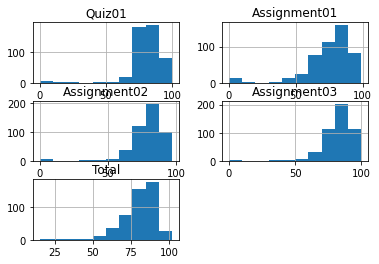

In [ ]:
_ = df2.hist()

The data distribution is pretty normal. So, normalization or standarization is optional

---

# Normalization or Standarization (Optional)

Normalization

In [ ]:
df2.loc[:, feature_columns] = (
    df2[feature_columns] - 
      df2[feature_columns].min()) / (df2[feature_columns].max() - df2[feature_columns].min())

df2[feature_columns].describe()

,Quiz01,Assignment01,Assignment02,Assignment03
count,486.000000,486.000000,486.000000,486.000000
mean,0.779012,0.762418,0.795193,0.808704
std,0.136834,0.179126,0.156491,0.129865
min,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.689394,0.742268,0.770000
50%,0.800000,0.797980,0.835052,0.830000
75%,0.850000,0.878788,0.896907,0.890000
max,1.000000,1.000000,1.000000,1.000000


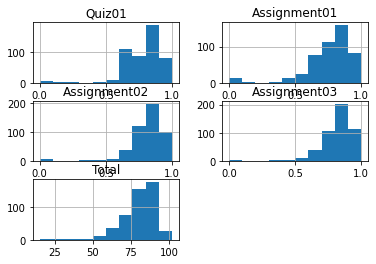

In [ ]:
_ = df2.hist()

Standardization

In [ ]:
df2.loc[:, feature_columns] = (
    df2[feature_columns] - 
      df2[feature_columns].mean()) / df2[feature_columns].std()

df2[feature_columns].describe()

,Quiz01,Assignment01,Assignment02,Assignment03
count,4.860000e+02,4.860000e+02,4.860000e+02,4.860000e+02
mean,-5.327243e-16,4.005712e-16,-1.800115e-16,2.919475e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.693117e+00,-4.256319e+00,-5.081397e+00,-6.227265e+00
25%,-5.774319e-01,-4.076705e-01,-3.381995e-01,-2.980303e-01
50%,1.533803e-01,1.985269e-01,2.547002e-01,1.639880e-01
75%,5.187865e-01,6.496506e-01,6.499667e-01,6.260063e-01
max,1.615005e+00,1.326336e+00,1.308744e+00,1.473040e+00


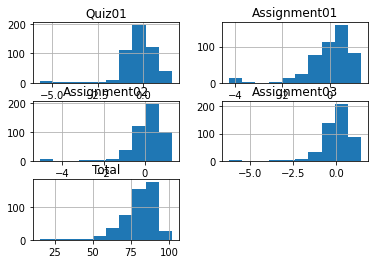

In [ ]:
_ = df2.hist()

---

# Split Dataset to Train & Test

Split the data

In [ ]:
# Shuffle
df = df2.sample(frac=1)

# Calculate test set size
test_set_size = int(len(df) * 0.2) # Split train 80% & test 20%

# Split the data
testing_df = df[:test_set_size]
training_df = df[test_set_size:]

print(f'Holding out {len(testing_df)} records for testing. ')
print(f'Using {len(training_df)} records for training.')

Holding out 97 records for testing. 
Using 389 records for training.


<Figure size 432x288 with 0 Axes>

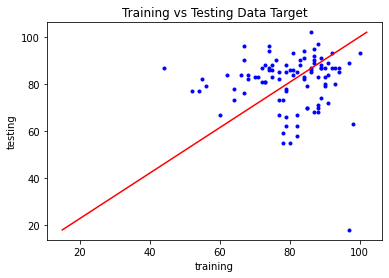

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualize the data target to see noise and outlier
import matplotlib.pyplot as plt

plt.plot(training_df[target_column][0:97], testing_df[target_column], 'b.')
#plt.plot(training_df[target_column][97:194], testing_df[target_column], 'b.')
#plt.plot(training_df[target_column][194:291], testing_df[target_column], 'b.')
#plt.plot(training_df[target_column][291:388], testing_df[target_column], 'b.')
plt.plot([training_df[target_column].min(), training_df[target_column].max()], [testing_df[target_column].min(), testing_df[target_column].max()], 'r-')
plt.xlabel('training')
plt.ylabel('testing')
plt.title('Training vs Testing Data Target')
plt.figure()

---

# Build Model

Build regression model with TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feature_count = len(feature_columns)

model = keras.Sequential([
  layers.Dense(64, input_shape=[feature_count]),
  layers.Dense(32, activation='relu'),
  layers.Dense(16),
  layers.Dense(1)
])

model.compile(
  loss='mse',
  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
  metrics=['mae', 'mse'],
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  training_df[feature_columns],
  training_df[target_column],
  epochs=EPOCHS,
  validation_split=0.2,
  callbacks=[early_stop],
)

Epoch 1/1000
10/10 [==============================] - 1s 17ms/step - loss: 8619.8193 - mae: 91.7868 - mse: 8619.8193 - val_loss: 8014.2822 - val_mae: 88.5346 - val_mse: 8014.2822
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 7228.1826 - mae: 84.0066 - mse: 7228.1826 - val_loss: 6695.5269 - val_mae: 80.9054 - val_mse: 6695.5269
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 6009.5405 - mae: 76.5968 - mse: 6009.5405 - val_loss: 5563.0337 - val_mae: 73.7400 - val_mse: 5563.0337
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 4986.1177 - mae: 69.7461 - mse: 4986.1177 - val_loss: 4600.2563 - val_mae: 67.0450 - val_mse: 4600.2563
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 4109.4453 - mae: 63.3057 - mse: 4109.4453 - val_loss: 3781.5969 - val_mae: 60.7719 - val_mse: 3781.5969
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 3367.9539 - mae: 57.2806 - mse: 336

Visualize the error

<Figure size 432x288 with 0 Axes>

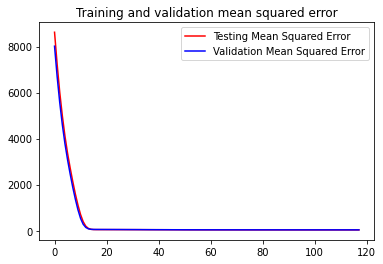

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

mse=history.history['mse']
val_mse=history.history['val_mse']

epochs=range(len(mse)) # Get number of epochs",

plt.plot(epochs, mse, 'r', label="Testing Mean Squared Error")
plt.plot(epochs, val_mse, 'b', label="Validation Mean Squared Error")
plt.legend(loc='upper right')
plt.title('Training and validation mean squared error')
plt.figure()

Calculate RMSE

In [ ]:
predictions = model.predict(testing_df[feature_columns])

In [ ]:
import math
from sklearn import metrics

root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(
      predictions,
      testing_df[target_column]
))

print("Root Mean Squared Error (on training data): %0.3f" % 
root_mean_squared_error)

Root Mean Squared Error (on training data): 6.498


<Figure size 432x288 with 0 Axes>

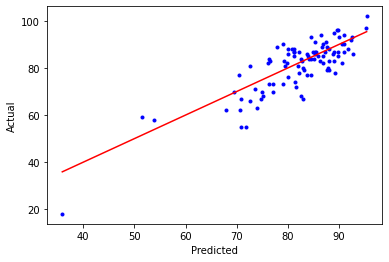

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(predictions, testing_df[target_column], 'b.')
plt.plot([predictions.min(), predictions.max()], [predictions.min(), predictions.max()], 'r-')
#plt.plot([0, 100], [75, 75], 'g-')
#plt.plot([75, 75], [0, 100], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure()

---

# Analyze Model Predict Result with The Actual

In [ ]:
#Data from testing data head
Q1 = pd.Series([95, 85, 85, 80, 85])
A1 = pd.Series([91, 76, 41, 78, 91])
A2 = pd.Series([90, 61, 61, 79, 80])
A3 = pd.Series([84, 73, 73, 79, 84])

x = pd.DataFrame({
  'Quiz01': Q1,
  'Assignment01': A1, 
  'Assignment02': A2,
  'Assignment03': A3,
})

In [ ]:
y = model.predict(x)

In [ ]:
y

array([[89.7654 ],
       [75.04125],
       [69.61688],
       [79.82435],
       [85.53693]], dtype=float32)

# Generate SavedModel

In [ ]:
export_dir = 'saved_model/2' # Set export directory
tf.saved_model.save(model, export_dir) # Save model to export dir

In [ ]:
# Convert the model to TFlite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
# Save the TFlite model
import pathlib

tflite_model_file = pathlib.Path('mejaku_model_v2.tflite')
tflite_model_file.write_bytes(tflite_model)

In [ ]:
#Download tflite model
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

In [ ]:
# Getting input output shape information for TFlite model
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="mejaku_model_v2.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[1 4]
<class 'numpy.float32'>
[1 1]
<class 'numpy.float32'>


# Testing TFlite Model on Colab

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
import numpy as np

# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(0,101):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    # Test the TensorFlow model on random input data.
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

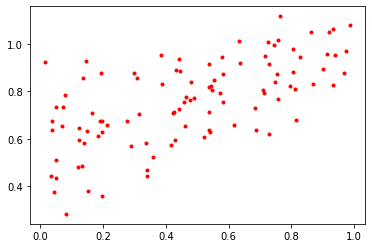

In [ ]:
%matplotlib inline

plt.plot(inputs, outputs, 'r.')
plt.show()

---

# Interact with GCP (Optional)

Deploy the model to GCP. Setting up bucket and copy needed data

In [ ]:
from google.colab import auth
auth.authenticate_user()

project_id = 'mejaku'
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://mejaku-model/


In [ ]:
bucket_name = project_id + '-model'

!gsutil -m cp -r /content/gdrive/My\ Drive/Github/student-prediction-outcome-for-mejaku-app/saved_model* gs://{bucket_name}/
!gsutil -m cp -r /content/gdrive/My\ Drive/Github/student-prediction-outcome-for-mejaku-app/data/test* gs://{bucket_name}/

Copying file:///content/gdrive/My Drive/Github/student-prediction-outcome-for-mejaku-app/saved_model/1/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
Copying file:///content/gdrive/My Drive/Github/student-prediction-outcome-for-mejaku-app/saved_model/1/variables/variables.index [Content-Type=application/octet-stream]...
Copying file:///content/gdrive/My Drive/Github/student-prediction-outcome-for-mejaku-app/saved_model/1/saved_model.pb [Content-Type=application/octet-stream]...
Copying file:///content/gdrive/My Drive/Github/student-prediction-outcome-for-mejaku-app/saved_model/2/saved_model.pb [Content-Type=application/octet-stream]...
Copying file:///content/gdrive/My Drive/Github/student-prediction-outcome-for-mejaku-app/saved_model/2/variables/variables.data-00000-of-00001 [Content-Type=application/octet-stream]...
Copying file:///content/gdrive/My Drive/Github/student-prediction-outcome-for-mejaku-app/saved_model/2/variables/variables.index [Cont

---

# Working with Git repo (Run this cell only want to interact wit git)

In [ ]:
!git config --global user.email "angelkarentia@gmail.com"
!git config --global user.name "Angel Karentia"

In [4]:
!git status

On branch main
Your branch is ahead of 'origin/master' by 17 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Predict Student Outcome Regression.ipynb
	modified:   Predict Student Outcome using Multiclass Data.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Predict Student Outcome Classification (1).ipynb
	Predict Student Outcome Regression (1).ipynb
	data/test/
	mejaku_model_v1.tflite
	mejaku_model_v2.tflite
	saved_model/

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .

In [ ]:
!git status

In [ ]:
!git commit -m "Add section for better understanding when reading the notebook"

---

# Push to Git (run only finish all)

In [ ]:
username = 'angellsongg'
git_token = 
repository = 'student-prediction-outcome-for-mejaku-app'

!git remote add origin https://{git_token}@github.com/{username}/{repository}.git
!git remote -v

In [ ]:
!git push -u origin master

In [5]:
!git log --oneline --graph

* 7764c1e (HEAD -> main, master) Add section for better understanding when reading the notebook
* 191326d Add scatter plot training vs testing data target
* 1f52fff Add histogram & change target
* 96968b4 Test the TfLite model on random input data
* 7de9876 Add generate model to TFlite
* 244f013 Change feature data
* 539a32e Using multiclass predicted only low perform
* 10531c8 Add visualization of predicted value
* 81d466b Add visualization of predicted value
* 5efe7f3 Add visualization predicted vs actual
* 9dc6fb4 Try simple NN using multiclass data
* af454b4 Add multiclass dataset
* 619df95 Try again simple NN
* 0ba1cb4 Update filter size
* 814f3fe Try simple NN
* 25a3077 Modeling with Standardization
* 28635aa Modeling with Normalization
* f1a88fc (origin/master) Add dataset


In [ ]:
!git revert HEAD